### Text Classification using LSTM

In [1]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\srika\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
import tensorflow as tf
import csv
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
vocab_size = 5000
embedding_dim = 64
max_length = 200
padding_type = 'post'
trunc_type = 'post'
oov_tok = '<OOV>'
training_portion = .8

In [4]:
articles = []
labels = []

with open("bbc-text.csv", 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader)
    for row in reader:
        labels.append(row[0])
        article = row[1]
        for word in STOPWORDS:
            token = ' ' + word + ' '
            article = article.replace(token, ' ')
            article = article.replace(' ', ' ')
        articles.append(article)
print(len(labels))
print(len(articles))

2225
2225


In [5]:
train_size = int(len(articles) * training_portion)

train_articles = articles[0: train_size]
train_labels = labels[0: train_size]

validation_articles = articles[train_size:]
validation_labels = labels[train_size:]

print(train_size)
print(len(train_articles))
print(len(train_labels))
print(len(validation_articles))
print(len(validation_labels))

1780
1780
1780
445
445


In [6]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_articles)
word_index = tokenizer.word_index

In [7]:
dict(list(word_index.items())[0:10])

{'<OOV>': 1,
 'said': 2,
 'mr': 3,
 'would': 4,
 'year': 5,
 'also': 6,
 'people': 7,
 'new': 8,
 'us': 9,
 'one': 10}

In [8]:
train_sequences  = tokenizer.texts_to_sequences(train_articles)

print(train_sequences[10])

[2431, 1, 225, 4995, 22, 641, 587, 225, 4995, 1, 1, 1662, 1, 1, 2431, 22, 565, 1, 1, 140, 278, 1, 140, 278, 796, 823, 662, 2307, 1, 1144, 1694, 1, 1721, 4996, 1, 1, 1, 1, 1, 4738, 1, 1, 122, 4515, 1, 2, 2873, 1506, 352, 4739, 1, 52, 341, 1, 352, 2172, 3963, 41, 22, 3794, 1, 1, 1, 1, 543, 1, 1, 1, 835, 631, 2366, 347, 4740, 1, 365, 22, 1, 787, 2367, 1, 4302, 138, 10, 1, 3664, 682, 3532, 1, 22, 1, 414, 823, 662, 1, 90, 13, 633, 1, 225, 4995, 1, 600, 1, 1694, 1021, 1, 4997, 808, 1865, 117, 1, 1, 1, 2973, 22, 1, 99, 278, 1, 1606, 4998, 543, 492, 1, 1444, 4741, 779, 1320, 1, 1862, 10, 33, 641, 319, 1, 62, 478, 565, 301, 1507, 22, 479, 1, 1, 1665, 1, 797, 1, 3066, 1, 1365, 6, 1, 2431, 565, 22, 2970, 4735, 1, 1, 1, 1, 1, 850, 39, 1826, 675, 297, 26, 979, 1, 882, 22, 361, 22, 13, 301, 1507, 1343, 374, 20, 63, 883, 1096, 4303, 247]


In [9]:
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [10]:
print(train_sequences[10])

[2431, 1, 225, 4995, 22, 641, 587, 225, 4995, 1, 1, 1662, 1, 1, 2431, 22, 565, 1, 1, 140, 278, 1, 140, 278, 796, 823, 662, 2307, 1, 1144, 1694, 1, 1721, 4996, 1, 1, 1, 1, 1, 4738, 1, 1, 122, 4515, 1, 2, 2873, 1506, 352, 4739, 1, 52, 341, 1, 352, 2172, 3963, 41, 22, 3794, 1, 1, 1, 1, 543, 1, 1, 1, 835, 631, 2366, 347, 4740, 1, 365, 22, 1, 787, 2367, 1, 4302, 138, 10, 1, 3664, 682, 3532, 1, 22, 1, 414, 823, 662, 1, 90, 13, 633, 1, 225, 4995, 1, 600, 1, 1694, 1021, 1, 4997, 808, 1865, 117, 1, 1, 1, 2973, 22, 1, 99, 278, 1, 1606, 4998, 543, 492, 1, 1444, 4741, 779, 1320, 1, 1862, 10, 33, 641, 319, 1, 62, 478, 565, 301, 1507, 22, 479, 1, 1, 1665, 1, 797, 1, 3066, 1, 1365, 6, 1, 2431, 565, 22, 2970, 4735, 1, 1, 1, 1, 1, 850, 39, 1826, 675, 297, 26, 979, 1, 882, 22, 361, 22, 13, 301, 1507, 1343, 374, 20, 63, 883, 1096, 4303, 247]


In [11]:
print(train_padded[10])

[2431    1  225 4995   22  641  587  225 4995    1    1 1662    1    1
 2431   22  565    1    1  140  278    1  140  278  796  823  662 2307
    1 1144 1694    1 1721 4996    1    1    1    1    1 4738    1    1
  122 4515    1    2 2873 1506  352 4739    1   52  341    1  352 2172
 3963   41   22 3794    1    1    1    1  543    1    1    1  835  631
 2366  347 4740    1  365   22    1  787 2367    1 4302  138   10    1
 3664  682 3532    1   22    1  414  823  662    1   90   13  633    1
  225 4995    1  600    1 1694 1021    1 4997  808 1865  117    1    1
    1 2973   22    1   99  278    1 1606 4998  543  492    1 1444 4741
  779 1320    1 1862   10   33  641  319    1   62  478  565  301 1507
   22  479    1    1 1665    1  797    1 3066    1 1365    6    1 2431
  565   22 2970 4735    1    1    1    1    1  850   39 1826  675  297
   26  979    1  882   22  361   22   13  301 1507 1343  374   20   63
  883 1096 4303  247    0    0    0    0    0    0    0    0    0    0
    0 

In [12]:
validation_sequences = tokenizer.texts_to_sequences(validation_articles)
validation_padded = pad_sequences(validation_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

print(len(validation_sequences))
print(validation_padded.shape)

445
(445, 200)


In [13]:
print(set(labels))

{'tech', 'sport', 'politics', 'business', 'entertainment'}


In [14]:
label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(labels)

training_label_seq = np.array(label_tokenizer.texts_to_sequences(train_labels))
validation_label_seq = np.array(label_tokenizer.texts_to_sequences(validation_labels))

In [15]:
model = tf.keras.Sequential([

    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
    tf.keras.layers.Dense(embedding_dim, activation='relu'),

    tf.keras.layers.Dense(6, activation='softmax')
])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          320000    
                                                                 
 bidirectional (Bidirection  (None, 128)               66048     
 al)                                                             
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 6)                 390       
                                                                 
Total params: 394694 (1.51 MB)
Trainable params: 394694 (1.51 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

num_epochs = 10

history = model.fit(train_padded, training_label_seq, epochs=num_epochs, 
                    validation_data=(validation_padded, validation_label_seq), verbose=2)



Epoch 1/10


56/56 - 22s - loss: 1.5984 - accuracy: 0.2826 - val_loss: 1.2982 - val_accuracy: 0.6719 - 22s/epoch - 388ms/step
Epoch 2/10
56/56 - 10s - loss: 0.8926 - accuracy: 0.7320 - val_loss: 0.7385 - val_accuracy: 0.7663 - 10s/epoch - 170ms/step
Epoch 3/10
56/56 - 10s - loss: 0.7201 - accuracy: 0.7629 - val_loss: 0.7043 - val_accuracy: 0.7281 - 10s/epoch - 174ms/step
Epoch 4/10
56/56 - 10s - loss: 0.4385 - accuracy: 0.8230 - val_loss: 0.4823 - val_accuracy: 0.8180 - 10s/epoch - 176ms/step
Epoch 5/10
56/56 - 10s - loss: 0.3127 - accuracy: 0.9034 - val_loss: 0.4803 - val_accuracy: 0.8315 - 10s/epoch - 174ms/step
Epoch 6/10
56/56 - 10s - loss: 0.2059 - accuracy: 0.9478 - val_loss: 0.6321 - val_accuracy: 0.7663 - 10s/epoch - 174ms/step
Epoch 7/10
56/56 - 10s - loss: 0.2142 - accuracy: 0.9449 - val_loss: 0.2960 - val_accuracy: 0.9393 - 10s/epoch - 172ms/step
Epoch 8/10
56/56 - 10s - loss: 0.0586 - accuracy: 0.9916 - val_loss: 0.3410 - val_accuracy: 0.9079 - 10s/epoch - 174ms/step
Epoch

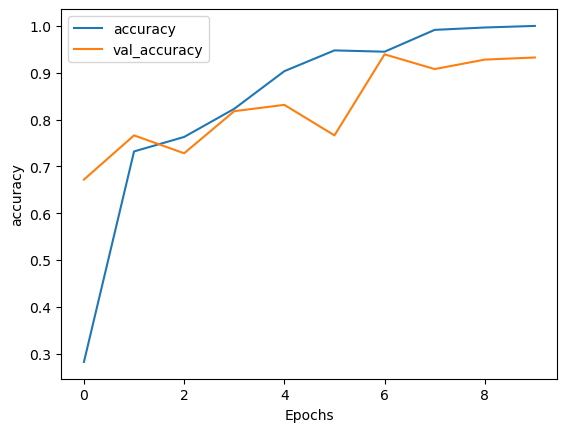

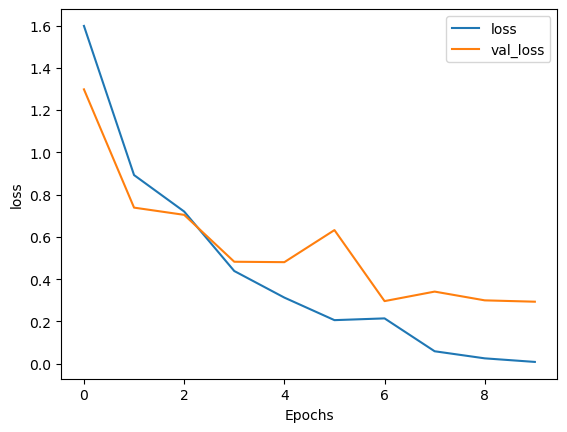

In [17]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")